#### How to read images in a folder

readImages.ipynb and trafficLightImages folder is being provided to help those who may need a little help in reading images from a file. There are many ways to read images and I am providing one example. The assumption is that the readImages.ipynb and trafficLightImages folder is in the same directory. Examine the directory structure of traffiLightImages folder. Also examine the images by clicking on them, just as you would clickin on any .jpg file.

You will benefit from using the "Basic classification: Classify images of clothing" as a template for the TF/Keras model. 

In [1]:
import random
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # for loading in images

%matplotlib inline

#### Import images in a list from a file

Notice the trafficLightImages/training/green has 4 files and we can verify the 4 file shave been read.

In [2]:
im_list_green=[]
im_list_red=[]
im_list_yellow=[]
im_list =[]
std_im_list = []

for file in glob.glob("trafficLightImages/training/green/*"):
    
    # Read in the image
    im = mpimg.imread(file)   
            
    # Append the image to the green image list
    im_list_green.append((im, 2))
    
for file in glob.glob("trafficLightImages/training/red/*"):
    
    # Read in the image
    im = mpimg.imread(file)   
            
    # Append the image to the red image list
    im_list_red.append((im, 0))
    
for file in glob.glob("trafficLightImages/training/yellow/*"):
    
    # Read in the image
    im = mpimg.imread(file)   
            
    # Append the image to the yellow image list
    im_list_yellow.append((im, 1))
    
#print(im_list_yellow)    
print(len(im_list_green))
print(len(im_list_red))
print(len(im_list_yellow))

im_list = im_list_red + im_list_yellow + im_list_green
print(len(im_list))

4
4
4
12


#### Explore the data

Notice the image dimensions
We will also explore the shape to verify the dimensions
Images are of different dimensions, so we will have to standardize

(93, 54, 3)


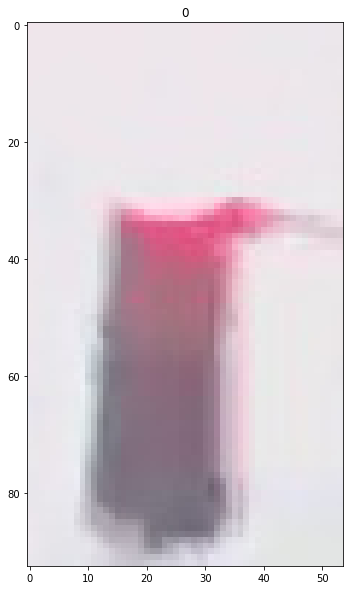

In [3]:
print(im_list[0][0].shape)
f, (ax1) = plt.subplots(1, 1, figsize=(20, 10))
ax1.set_title(im_list[0][1])
ax1.imshow(im_list[0][0])

#### Preprocess the data
Standardize the image to 32X32X3 and verify the dimesions of the standardized image. It is of utmost importance that all images are of the same dimensions for training and testing the model. 

In [4]:
# This function should take in an RGB image and return a new, standardized version
def standardize_input(image):
    image_crop = np.copy(image)
    row_crop = 7
    col_crop = 8
    image_crop = image[row_crop:-row_crop, col_crop:-col_crop, :]
    ## TODO: Resize image and pre-process so that all "standard" images are the same size
    standard_im = cv2.resize(image_crop, (32, 32))
    return standard_im

In [5]:
import cv2 # helper functions

def standardize(image_list):
    
    # Empty image data array
    standard_list = []

    # Iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]

        # Standardize the image
        standardized_im = standardize_input(image)

        # Append the image, and it's one hot encoded label to the full, processed list of image data 
        standard_list.append((standardized_im, label))
        
    return standard_list

# Standardize all training images
#STANDARDIZED_LIST = standardize(IMAGE_LIST)


std_im_list = standardize(im_list)

(32, 32, 3)


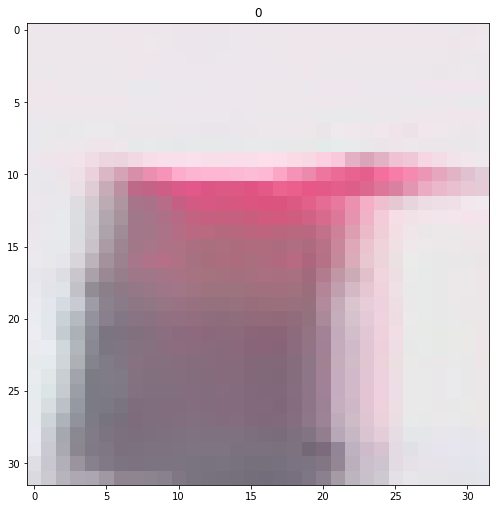

In [6]:
print(std_im_list[0][0].shape)
f, (ax1) = plt.subplots(1, 1, figsize=(20,8.5))
ax1.set_title(std_im_list[0][1])
ax1.imshow(std_im_list[0][0])

Please ask questions if something does not make sense. You are alomost ready to train the model, but not quite. Review model.fit usage. What is missing? 

In [7]:
import random

train_images = []
train_labels = []

print(len(std_im_list))
random.shuffle(std_im_list)

for im in std_im_list:
    train_images.append(im[0])
    train_labels.append(im[1])
    
print(train_labels)

12
[2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 1, 0]


In [8]:
# TensorFlow and tf.keras
import tensorflow as tf

print(tf.__version__)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3)
])

2022-12-01 05:07:39.042565: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-01 05:07:39.249863: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-01 05:07:39.262914: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.10/site-packages/cv2/../../lib64:
2022-12-01 05:07:39.262947: I tensorflo

2.10.0


2022-12-01 05:07:41.170431: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.10/site-packages/cv2/../../lib64:
2022-12-01 05:07:41.170481: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-01 05:07:41.170520: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-cyli6138): /proc/driver/nvidia/version does not exist
2022-12-01 05:07:41.170993: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 436ms/step - loss: 49.6210 - accuracy: 0.1667
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 941.6729 - accuracy: 0.3333
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 392.7922 - accuracy: 0.3333
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 70.3051 - accuracy: 0.6667
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 175.2927 - accuracy: 0.6667
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 135.4550 - accuracy: 0.5833
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 45.7728 - accuracy: 0.7500
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 6.4986 - accuracy: 0.9167
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 72.8259 - accuracy: 0.5833
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 47.4864 - accuracy: 0.7500
